# Exercise Notebook: Exploring Text Embeddings and Information Retrieval

## Objective:
In this exercise, we will:
1. Review the concept of text embeddings.
2. Implement three information retrieval techniques: TF-IDF, BM25, and Sentence Transformers.
3. Visualize the results of these models in 2D and compare their performance for movie recommendation based on title and overview.

### 1. Review of Text Embeddings

#### What are Embeddings?
Embeddings are dense vector representations of text that capture semantic information. Rather than representing words or documents as **sparse one-hot vectors**, embeddings map them to continuous vector spaces where semantically similar items are closer together.

There are different techniques to generate embeddings:
- **TF-IDF**: Statistical method that reflects how important a word is to a document in a collection.
- **BM25**: A probabilistic model that improves upon TF-IDF by considering term frequency saturation and document length.
- **Sentence Transformers**: Use deep learning models to generate embeddings for sentences or documents that reflect semantic meaning.


Relevant: [one-hot encoding](https://developers.google.com/machine-learning/crash-course/categorical-data/one-hot-encoding)

### 2. Dataset
We will use the [Movies Dataset from Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset) to create a simple movie recommendation system based on titles and overviews.

The dataset includes:
- **title**: Name of the movie
- **overview**: A brief description of the movie

#### Task 1: Load the dataset
Download the dataset and load it into a Pandas DataFrame.


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('movies_metadata.csv')

# Keep only the 'title' and 'overview' columns
df = df[['title', 'overview']]

# Display first few rows
df.head()

,title,overview
0,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,Jumanji,When siblings Judy and Peter discover an encha...
2,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,Father of the Bride Part II,Just when George Banks has recovered from his ...


### Task 1.1 Explore data
Check for missing data, title and overview length distribution and perform a word cloud visualization

In [6]:
def missing_statistics(df):

    missing_values = df.isnull().sum()

    missing_percentage = (missing_values / len(df)) * 100

    missing_data_stats = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })

    print("Missing Data Statistics:")
    print(missing_data_stats)

missing_statistics(df)

Missing Data Statistics:
          Missing Values  Percentage
title                  1    0.011154
overview              25    0.278862


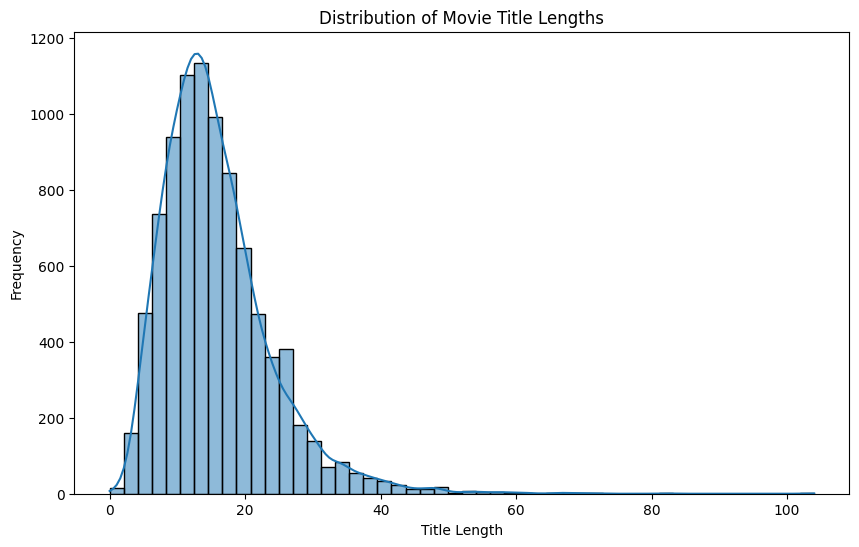

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def compute_title_distribution(df):
    df['title_length'] = df['title'].fillna('').apply(lambda x: len(str(x)))

    plt.figure(figsize=(10, 6))
    sns.histplot(df['title_length'], bins=50, kde=True)
    plt.title('Distribution of Movie Title Lengths')
    plt.xlabel('Title Length')
    plt.ylabel('Frequency')
    plt.show()

compute_title_distribution(df)


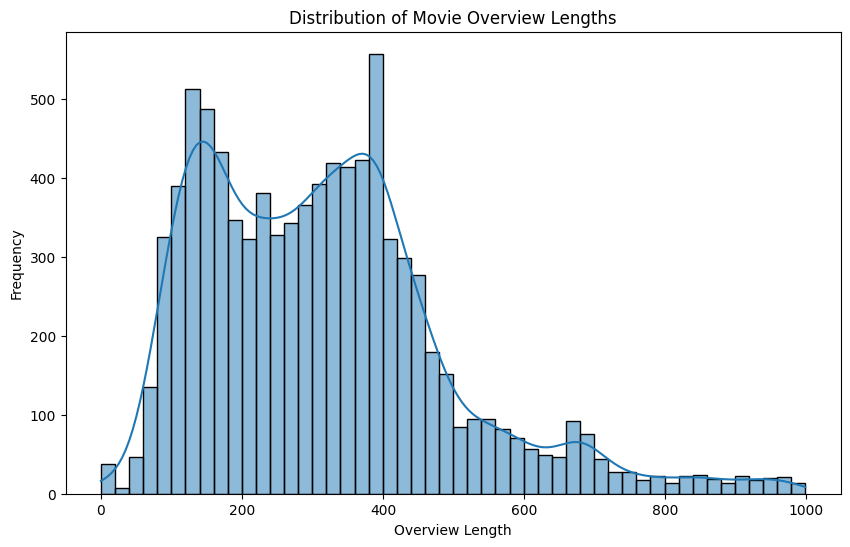

In [12]:
def compute_overview_distribution(df):
    df['overview_length'] = df['overview'].fillna('').apply(lambda x: len(str(x)))

    plt.figure(figsize=(10, 6))
    sns.histplot(df['overview_length'], bins=50, kde=True)
    plt.title('Distribution of Movie Overview Lengths')
    plt.xlabel('Overview Length')
    plt.ylabel('Frequency')
    plt.show()

compute_overview_distribution(df)

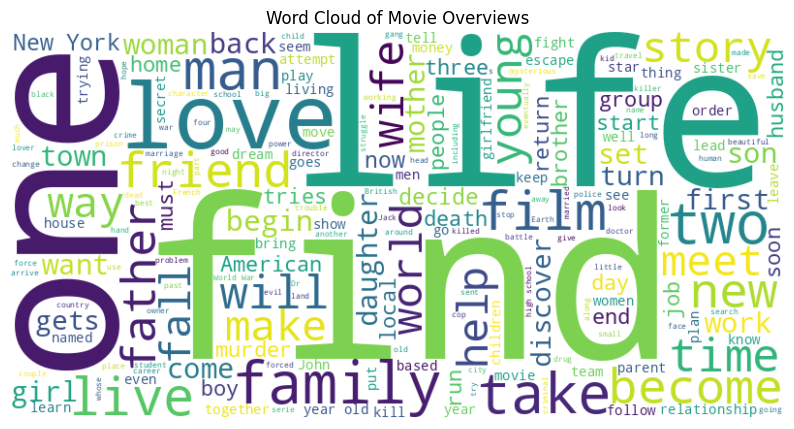

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def world_cloud(df):
    text = ' '.join(df['overview'].dropna().astype(str))

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Movie Overviews')
    plt.show()

world_cloud(df)


### 3. Data Preprocessing
Before we move on to the information retrieval methods, we'll preprocess the data by cleaning the text and performing tokenization. This will help ensure better results from our algorithms.

#### Task 2: Clean the text
Write a function to clean the text by removing punctuation, converting it to lowercase, and removing digits.

In [15]:
import re
import string

def clean_text(text):

    text = str(text)

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = text.lower()

    text = re.sub(r'\d+', '', text)

    text = text.strip()

    return text



In [25]:
from sklearn.model_selection import train_test_split


In [26]:
# Apply cleaning function to 'overview' and 'title' columns
df['overview'] = df['overview'].apply(clean_text)
df['title'] = df['title'].apply(clean_text)

# Split data into train and test for evaluation
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
#In this notebook we will not be doing evaluation yet, feel free to use all data.

# Display a cleaned sample
df.head()

,title,overview,title_length,overview_length
0,toy story,led by woody andys toys live happily in his ro...,9,303
1,jumanji,when siblings judy and peter discover an encha...,7,395
2,grumpier old men,a family wedding reignites the ancient feud be...,16,327
3,waiting to exhale,cheated on mistreated and stepped on the women...,17,270
4,father of the bride part ii,just when george banks has recovered from his ...,27,318


### 4. TF-IDF Approach
#### Task 3: Apply TF-IDF Vectorization
Use `TfidfVectorizer` to transform the 'overview' text data into a TF-IDF matrix. Compute the cosine similarity between the movie overviews.

Relevant: [TfidfVectorizer](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
# Fit and transform the overview data
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(train_data['overview'])

In [32]:
# Compute the cosine similarity matrix
cos_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get top 5 similar movies based on cosine similarity
def get_similar_movies(index, cos_sim_matrix, top_n=5):
    similar_indices = cos_sim_matrix[index].argsort()[-top_n-1:-1][::-1]
    return train_data.iloc[similar_indices][['title', 'overview']]

# Example: Get similar movies for the first movie
get_similar_movies(0, cos_sim_tfidf)

,title,overview
2493,get real,a tenderly romantic comingofage story as two b...
3923,imaginary crimes,a recently widowed smalltime hustler struggles...
7248,mac,niccolo mac vitelli is the eldest of three bro...
303,three colors blue,a woman struggles to find a way to live her li...
7199,wilbur wants to kill himself,the strange comedy film of two close brothers ...


### 5. BM25 Approach
#### Task 4: Apply BM25 (bonus)
Use the `rank_bm25` library to compute BM25 scores for the overviews of the movies.

```python
from rank_bm25 import BM25Okapi
```

Relevant: [rank_bm25](https://pypi.org/project/rank-bm25/)

In [36]:
from rank_bm25 import BM25Okapi



ModuleNotFoundError: No module named 'rank_bm25'

### 6. Sentence Transformers Approach
#### Task 5: Apply Sentence Transformers
Use the `sentence-transformers` library to generate dense embeddings for the titles and overviews. Then compute cosine similarity between the embeddings.

Relevant: [sentence-transformers](https://sbert.net/)


In [ ]:
from sentence_transformers import SentenceTransformer

# Initialize pre-trained model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings for titles and overviews
embeddings = model.encode#TODO

In [ ]:
def compute_cosine_similarity(embeddings, index):
    #TODO
    raise

# Get top 5 similar movies based on sentence embeddings
cos_sim_sentence = compute_cosine_similarity(embeddings, 0)
top_sentence_indices = cos_sim_sentence.argsort()[-6:-1][::-1]
train_data.iloc[top_sentence_indices][['title', 'overview']]

### 7. Visualization of Embeddings in 2D
We will now visualize the embeddings of the three methods (TF-IDF, BM25, and Sentence Transformers) in 2D space using **t-SNE**. This will help us understand which method captures the best semantic relationships.

#### Task 6: Visualize the embeddings
Use t-SNE to reduce the dimensionality of the embeddings and plot them in 2D.

Relevant: [t-SNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
[PCA](https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reduce the dimensionality of the embeddings for visualization
def plot_embeddings(embeddings, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', edgecolors='k', alpha=0.7)
    plt.title(f'2D Visualization of {title} Embeddings')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()

# TF-IDF Visualization
plot_embeddings(tfidf_matrix.toarray(), 'TF-IDF')

# Sentence Transformer Visualization
plot_embeddings(embeddings, 'Sentence Transformers')

### Task 6.1
You showed the plots you just did above to your boss but he is finding it hard to understand if the embeddings are capturing any meaningfull value.
What do you do?

In [ ]:
#TODO
#maybe look at the rest of the data and try to put better labels on the plot so its easier to understand ?

### 8. Discussion and Comparison
#### Questions for the students to reflect on:
- **Why do we clean the data?**
- **Do we always need to clean the data?**
- **What is the conceptual difference between syntatic and semantic embeddings?**
- **Which embedding method appears to capture the best semantic relationships between movies?**
- **Do the 2D visualizations show any clear clusters or patterns?**
- **How do the different algorithms perform when compared in terms of recommendation accuracy?**
- **Can the additional metadata (e.g., genres, actors) improve the system? If so, how?**

### 9. Extension Ideas
- **Improve with additional metadata**: You can integrate other columns like 'genres', 'cast', or 'director' to generate richer embeddings.
- **Evaluation**: Perform precision and recall evaluation on your retrieval methods by comparing the top recommendations against a manually curated set of similar movies - we will be doing this in a future exercise today.
- **Model Fine-Tuning**: Fine-tune a Sentence-Transformer model on your dataset to improve the embeddings.